## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Dropout 
def build_mlp(Input_shape,Output_units=10,num_neurons=[512,256,128],drt_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(Input_shape)
    
    for i ,n_units in enumerate(num_neurons):
        if i ==0 :
            x = keras.layers.Dense(units=n_units, 
                               activation='relu' , 
                               name = "hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drt_ratio)(x)
        else :
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name = "hidden_layer"+str(i+1))(x)
            x = Dropout(drt_ratio)(x)
    
    out =keras.layers.Dense(units=Output_units, activation="softmax",name = "Output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    
    return model

In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 250
MOMENTUM = 0.95
Dropout_EXP = 0.25
from keras.optimizers import SGD ,Adam

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(Input_shape=x_train.shape[1:],drt_ratio=Dropout_EXP)
model.summary()
# optimizer = SGD(lr=LEARNING_RATE , momentum=MOMENTUM ,nesterov=True)
optimizer = Adam(lr=LEARNING_RATE)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ['accuracy'])
model.fit(x_train,y_train,
         epochs= EPOCHS,
         batch_size = BATCH_SIZE,
         validation_data=(x_test,y_test),
         shuffle = True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4948 - acc: 0.4619 - val_loss: 1.4518 - val_acc: 0.4817


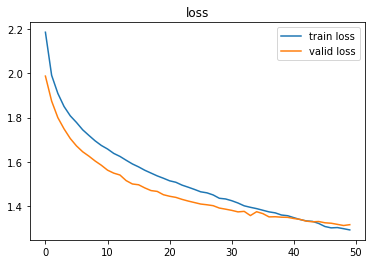

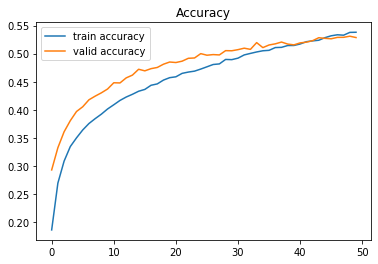

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss, label = "train loss")
plt.plot(range(len(valid_loss)),valid_loss , label= "valid loss")
plt.legend()
plt.title("loss")
plt.show()


plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()